In [149]:
# Data Preprocessing
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("Dataset-Mental-Disorders.csv")

features = dataset.drop(['Expert Diagnose','Patient Number'], axis=1)
label = dataset['Expert Diagnose']
dataset

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Patiant-116,Most-Often,Seldom,Usually,Sometimes,NO,YES,NO,NO,YES,NO,YES,NO,NO,YES,2 From 10,5 From 10,3 From 10,Depression
116,Patiant-117,Sometimes,Sometimes,Sometimes,Seldom,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,6 From 10,7 From 10,8 From 10,Bipolar Type-1
117,Patiant-118,Usually,Sometimes,Usually,Sometimes,YES,NO,YES,YES,NO,NO,NO,YES,NO,YES,1 From 10,5 From 10,3 From 10,Bipolar Type-2
118,Patiant-119,Usually,Sometimes,Seldom,Seldom,NO,YES,YES,NO,YES,YES,YES,NO,YES,YES,7 From 10,7 From 10,7 From 10,Depression


In [150]:
# Adjust Usually, Sometimes, Most-Often, Seldom columns
new_values = {'Seldom': 0, 'Sometimes': 1, 'Usually': 2, 'Most-Often': 3}
columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']
for column in columns:
  features[column] = features[column].map(new_values)

# Adjust YES NO columns
new_values = {'YES': 1, 'YES ': 1, 'NO': 0}
columns = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']
for column in columns:
  features[column] = features[column].map(new_values)

# Adjust 3 of 10 columns
columns = ['Sexual Activity', 'Concentration', 'Optimisim']
for column in columns:
  features[column] = features[column].apply(lambda x: float(x[0]))

features

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3.0,3.0,4.0
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4.0,2.0,5.0
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6.0,5.0,7.0
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3.0,2.0,2.0
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,3,0,2,1,0,1,0,0,1,0,1,0,0,1,2.0,5.0,3.0
116,1,1,1,0,1,0,0,0,0,1,0,0,0,1,6.0,7.0,8.0
117,2,1,2,1,1,0,1,1,0,0,0,1,0,1,1.0,5.0,3.0
118,2,1,0,0,0,1,1,0,1,1,1,0,1,1,7.0,7.0,7.0


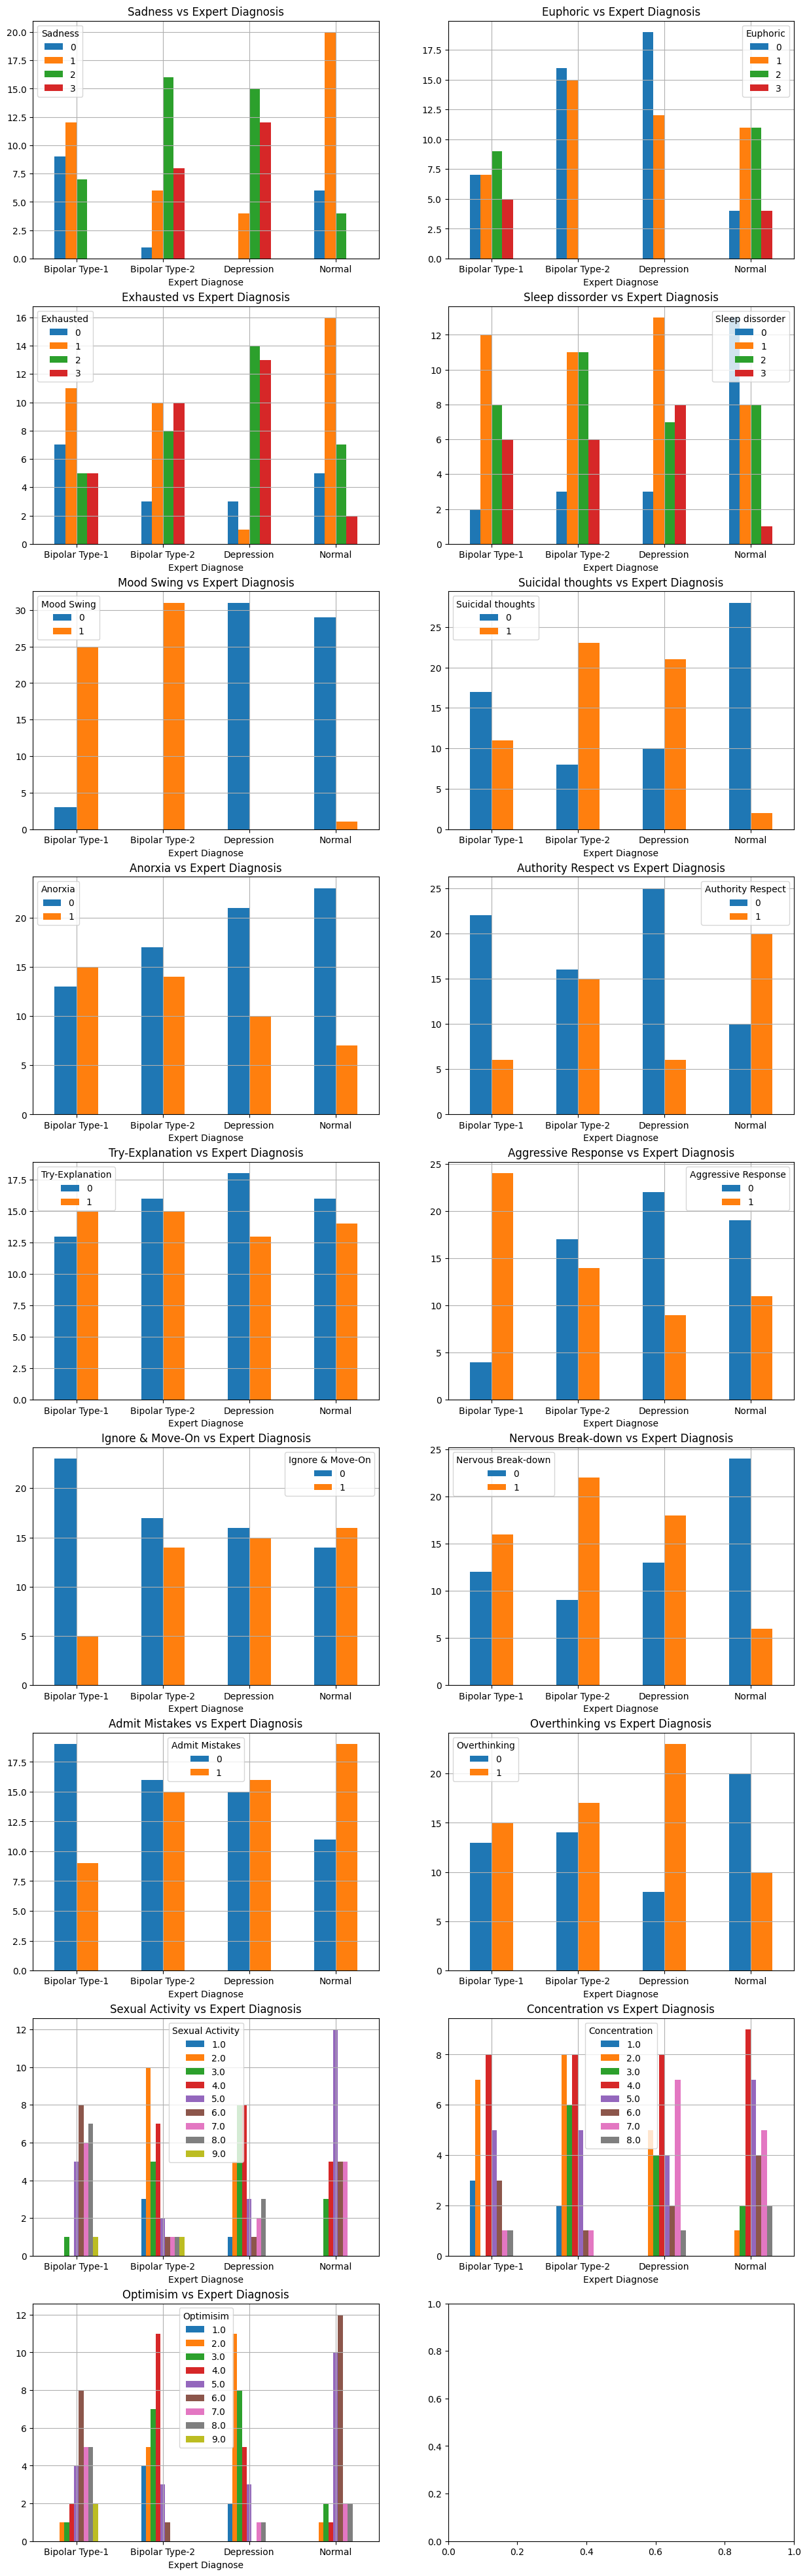

In [151]:
# Visualize each feature vs the class label (Expert Diagnosis)
fig, axes = plt.subplots(9, 2, figsize = (15, 50))
axes = axes.flatten()
for index, column in enumerate(features.columns):
    if index in [14, 15, 16]:
        pd.crosstab(label, features[column]).plot(kind='bar', rot=0, grid=True, ax=axes[index])
        axes[index].set_title(f'{column} vs Expert Diagnosis')
    else:
        pd.crosstab(label, features[column]).plot(kind='bar', rot=0, grid=True, ax=axes[index])
        axes[index].set_title(f'{column} vs Expert Diagnosis')

<Axes: title={'center': 'Class Labels'}, xlabel='Expert Diagnose'>

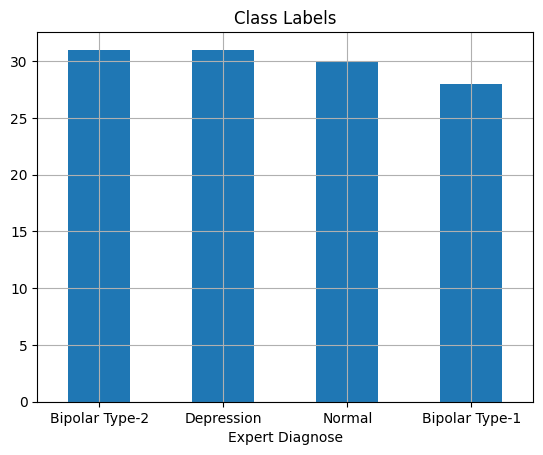

In [152]:
# Visualize Diagnosis Counts
label.value_counts().plot(kind='bar', rot=0, title='Class Labels', grid=True)

In [153]:
# Change label string values to numerical
label = label.map({
  'Bipolar Type-2': 0, 
  'Depression': 1, 
  'Bipolar Type-1': 2, 
  'Normal': 3
})
label.head()

0    0
1    1
2    2
3    0
4    3
Name: Expert Diagnose, dtype: int64

In [154]:
### Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features.values, label.values, test_size = 0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

96 24 96 24


In [155]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
training_scaler = StandardScaler()
testing_scaler = StandardScaler()

X_train = training_scaler.fit_transform(X_train)
X_test = testing_scaler.fit_transform(X_test)

In [156]:
# Build Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
logistic_classifier_prediction = logistic_classifier.predict(X_test)

# Build Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
naive_bayes_prediction = naive_bayes_classifier.predict(X_test)

# Build Support Vector Machine
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)

# Build Kernel Support Vector Machine Model
from sklearn.svm import SVC
kernel_svc = SVC(kernel = 'rbf') # Radial Base Function
kernel_svc.fit(X_train, y_train)
kernel_svc_prediction = svc.predict(X_test)

# Build K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsClassifier
kneighbors = KNeighborsClassifier(n_neighbors = 10)
kneighbors.fit(X_train, y_train)
kneighbors_prediction = kneighbors.predict(X_test)

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_prediction = tree.predict(X_test)

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)
forest_prediction = forest.predict(X_test)

In [157]:
### Evaluate Classification Models
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression
logistic_matrix = confusion_matrix(y_test, logistic_classifier_prediction)
logistic_accuracy = accuracy_score(y_test, logistic_classifier_prediction)

# Naive Bayes Model
naive_bayes_matrix = confusion_matrix(y_test, naive_bayes_prediction)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_prediction)

# Support Vector Machine Model
svc_matrix = confusion_matrix(y_test, svc_prediction)
svc_accuracy = accuracy_score(y_test, svc_prediction)

# Kernel Support Vector Machine Model
kernel_svc_matrix = confusion_matrix(y_test, kernel_svc_prediction)
kernel_svc_accuracy = accuracy_score(y_test, kernel_svc_prediction)

# K Nearest Neighbor Model
kneighbors_matrix = confusion_matrix(y_test, kneighbors_prediction)
kneighbors_accuracy = accuracy_score(y_test, kneighbors_prediction)

# Decision Tree Model
tree_matrix = confusion_matrix(y_test, tree_prediction)
tree_accuracy = accuracy_score(y_test, tree_prediction)

# Random Forest Model
forest_matrix = confusion_matrix(y_test, forest_prediction)
forest_accuracy = accuracy_score(y_test, forest_prediction)

In [158]:
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}")
print(f"Support Vector Machine Accuracy: {svc_accuracy:.2f}")
print(f"Kernel Support Vector Machine Accuracy: {kernel_svc_accuracy:.2f}")
print(f"K Nearest Neighbors Accuracy: {kneighbors_accuracy:.2f}")
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")
print(f"Random Forest Accuracy: {forest_accuracy:.2f}\n")


# print(f"Logistic Regression Matrix:\n {logistic_matrix}\n")
# print(f"Naive Bayes Matrix:\n {naive_bayes_matrix}\n")
# print(f"Support Vector Machine Matrix:\n {svc_matrix}\n")
# print(f"Kernel Support Vector Machine Matrix:\n {kernel_svc_matrix}\n")
# print(f"K Nearest Neighbors Matrix:\n {kneighbors_matrix}\n")
# print(f"Decision Tree Matrix:\n {tree_matrix}\n")
# print(f"Random Forest Matrix:\n {forest_matrix}\n")

Logistic Regression Accuracy: 0.83
Naive Bayes Accuracy: 0.50
Support Vector Machine Accuracy: 0.71
Kernel Support Vector Machine Accuracy: 0.71
K Nearest Neighbors Accuracy: 0.75
Decision Tree Accuracy: 0.75
Random Forest Accuracy: 0.88



<Axes: title={'center': 'Feature Importance'}>

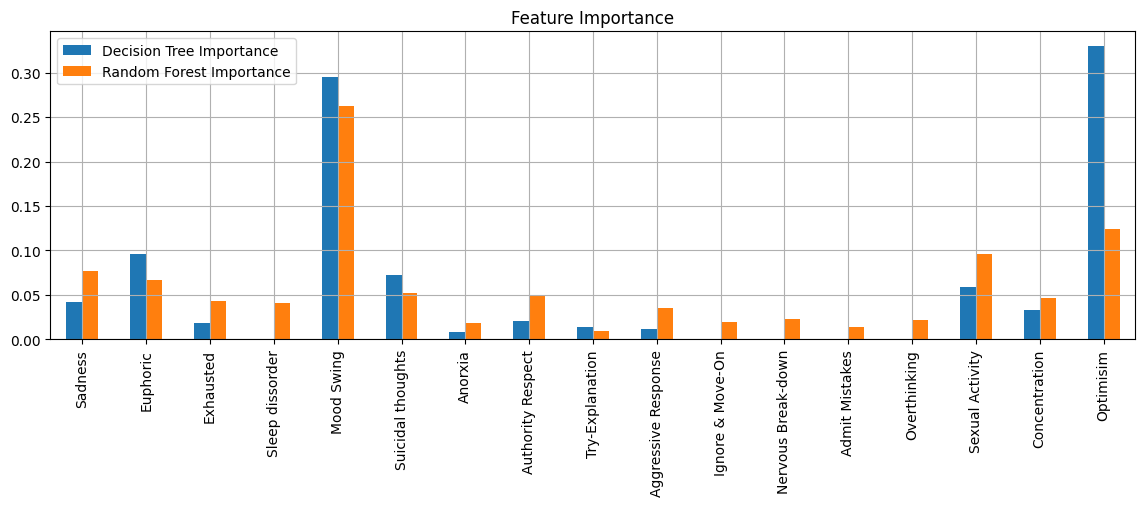

In [159]:
# Feature Importance
feature_importance = pd.DataFrame({
  'Decision Tree Importance': tree.feature_importances_, 
  'Random Forest Importance': forest.feature_importances_}, index=features.columns)
feature_importance.plot(kind='bar', rot=90, figsize=(14,4), title='Feature Importance', grid=True)

In [160]:
y_train = y_train.reshape((96, 1))
y_test = y_test.reshape((24, 1))

In [161]:
from keras import Sequential
from keras.layers import Dense, InputLayer
from keras.optimizers import Adam
from keras.metrics import SparseCategoricalAccuracy
from keras.losses import SparseCategoricalCrossentropy

ANN = Sequential([
  InputLayer(shape = (17,)),
  Dense(units=20, activation='relu'),
  Dense(units=10, activation='relu'),
  Dense(units=4, activation='softmax')
])

ANN.compile(optimizer=Adam(), loss= SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])
training_results = ANN.fit(X_train, y_train, epochs=160)

Epoch 1/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - loss: 1.8917 - sparse_categorical_accuracy: 0.2409   
Epoch 2/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7067 - sparse_categorical_accuracy: 0.2930 
Epoch 3/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7370 - sparse_categorical_accuracy: 0.2578 
Epoch 4/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7229 - sparse_categorical_accuracy: 0.2096 
Epoch 5/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6844 - sparse_categorical_accuracy: 0.2292 
Epoch 6/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.6225 - sparse_categorical_accuracy: 0.2448  
Epoch 7/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - loss: 1.5690 - sparse_categorical_accuracy: 0.2461
Epoch 8/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5281 - sparse_categorical_accuracy: 0.2344 
Epoch 9/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.5100 - sparse_categorical_accuracy: 0.2357  
Epoch 10/160
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 1.3974 - spars

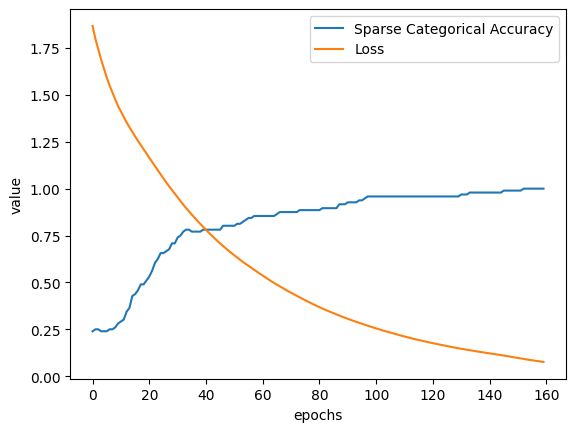

In [162]:
plt.plot(training_results.history['sparse_categorical_accuracy'])
plt.plot(training_results.history['loss'])
plt.xlabel('epochs')
plt.ylabel('value')
plt.legend(['Sparse Categorical Accuracy', 'Loss'])
plt.show()

In [163]:
ANN.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.5682 - sparse_categorical_accuracy: 0.7917


[0.5681958794593811, 0.7916666865348816]